# Zero-shot Agent with Confirmation

sys.path::: ['/Users/thanhnguyen/.local/share/uv/python/cpython-3.11.1-macos-aarch64-none/lib/python311.zip', '/Users/thanhnguyen/.local/share/uv/python/cpython-3.11.1-macos-aarch64-none/lib/python3.11', '/Users/thanhnguyen/.local/share/uv/python/cpython-3.11.1-macos-aarch64-none/lib/python3.11/lib-dynload', '', '/Users/thanhnguyen/Agility/Training/thanh.nguyendiem/multi-agents-training/5-practice/customer-support-bot/.venv/lib/python3.11/site-packages', '..', '../..']


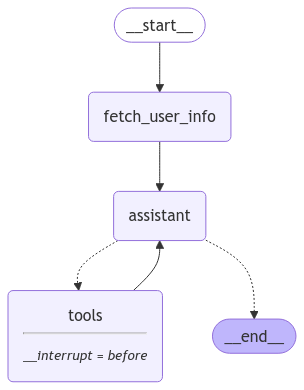

In [ ]:
# allow import
import sys
sys.path.append('../..')
from IPython.display import Image, display
from zero_shot_agent_with_confirmation.graph import graph

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

## Example conversation

In [ ]:
import shutil
import uuid
from scripts.populate_db import update_dates
from utils.debug import _print_event


# Let's create an example conversation a user might have with the assistant
tutorial_questions = [
    "Hi there, what time is my flight?",
    # "Am i allowed to update my flight to something sooner? I want to leave later today.",
    # "Update my flight to sometime next week then",
    # "The next available option is great",
    # "what about lodging and transportation?",
    # "Yeah i think i'd like an affordable hotel for my week-long stay (7 days). And I'll want to rent a car.",
    # "OK could you place a reservation for your recommended hotel? It sounds nice.",
    # "yes go ahead and book anything that's moderate expense and has availability.",
    # "Now for a car, what are my options?",
    # "Awesome let's just get the cheapest option. Go ahead and book for 7 days",
    # "Cool so now what recommendations do you have on excursions?",
    # "Are they available while I'm there?",
    # "interesting - i like the museums, what options are there? ",
    # "OK great pick one and book it for my second day there.",
]

# Update with the backup file so we can restart from the original place in each section
db = update_dates("travel2.sqlite")
thread_id = str(uuid.uuid4())

config = {
    "configurable": {
        # The passenger_id is used in our flight tools too
        # fetch the user's flight information
        "passenger_id": "3442 587242",
        # Checkpoints are accessed by thread_id
        "thread_id": thread_id,
    }
}

_printed = set()
for question in tutorial_questions:
    events = graph.stream(
        {"messages": ("user", question)}, config, stream_mode="values"
    )
    for event in events:
        _print_event(event, _printed)